<a href="https://colab.research.google.com/github/michaelajao/deep-learning-stock-trading/blob/master/new_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mpl_finance

In [ ]:
!pip install duka

In [ ]:
!pip install shap

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import itertools
import sklearn
import time
import keras
import datetime
import shap

import duka.app.app as import_ticks_method
from duka.core.utils import TimeFrame

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from matplotlib import pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc


print('Numpy version: ' + np.__version__)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
print('Sklearn version: ' + sklearn.__version__)
print('Keras version: ' + keras.__version__)

Numpy version: 1.18.5
Pandas version: 1.0.5
Matplotlib version: 3.2.2
Sklearn version: 0.22.2.post1
Keras version: 2.4.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# uncomment this block of code to download the EURUSD tick data for 5 months
start_date = datetime.date(2018,1,1) 
end_date = datetime.date(2018,3,1)
Assets = ['EURUSD']

import_ticks_method(Assets, start_date, end_date, 1, TimeFrame.TICK, ".", True) 

[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-02, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/02/03h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-03, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/03/01h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/16/06h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/16/06h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/16/13h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-01-04, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/04/07h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-05, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/05/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-07, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/07/00h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-08, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/08/03h_ticks.bi5 after ATTEMPTS attempts
[#################

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/09/05h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/09/05h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/09/06h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-01-09, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/09/04h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/09/07h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/09/07h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/09/08h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-01-10, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/10/03h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/11/06h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/11/06h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/11/07h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-01-11, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/11/01h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-12, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/12/03h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-14, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/14/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-15, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/15/04h_ticks.bi5 after ATTEMPTS attempts
[#################

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/16/03h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/16/03h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/16/05h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-01-16, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/16/01h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-17, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/17/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-18, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/18/04h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/19/06h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/19/06h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/19/07h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-01-19, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/19/05h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-21, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/21/03h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-22, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/22/00h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-23, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/23/00h_ticks.bi5 after ATTEMPTS attempts
[#################

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/24/05h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/24/05h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/24/09h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-01-24, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/24/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/24/16h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/24/16h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/24/17h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-01-25, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/25/01h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-26, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/26/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/28/03h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/28/03h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/28/04h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-01-28, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/28/00h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-29, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/29/01h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-01-30, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/30/03h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/04/08h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/04/08h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/04/11h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-01-31, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/31/05h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/01/06h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/01/06h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/01/07h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-02-01, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/01/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-02, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/02/00h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-04, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/04/00h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/05/02h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/05/02h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/05/05h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-02-05, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/05/01h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-06, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/06/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-07, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/07/00h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/08/03h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/08/03h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/08/04h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-02-08, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/08/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-09, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/09/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-11, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/11/00h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-12, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/12/01h_ticks.bi5 after ATTEMPTS attempts
[#################

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/14/03h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/14/03h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/14/05h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-02-14, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/14/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-15, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/15/03h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-16, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/16/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-18, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/18/00h_ticks.bi5 after ATTEMPTS attempts
[#################

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/19/03h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/19/03h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/19/04h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-02-19, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/19/00h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-20, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/20/00h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-21, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/21/02h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-02-22, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/22/02h_ticks.bi5 after ATTEMPTS attempts
[#################

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/25/03h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/25/03h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/25/04h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-02-25, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/25/00h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/25/10h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/25/10h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/25/11h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-02-26, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/26/03h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/31/08h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/31/08h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/00/31/11h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-02-27, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/27/05h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/28/10h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38, in get
    raise Exception("Request failed for {0} after ATTEMPTS attempts".format(url))
Exception: Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/28/10h_ticks.bi5 after ATTEMPTS attempts
Task exception was never retrieved
future: <Task finished coro=<get() done, defined at /usr/local/lib/python3.6/dist-packages/duka/core/fetch.py:16> exception=Exception('Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/28/11h_ticks.bi5 after ATTEMPTS attempts',)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/duka/core/fetch.py", line 38

ERROR for 2018-02-28, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/01/28/04h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  ERROR for 2018-03-01, EURUSD Exception : Request failed for https://www.dukascopy.com/datafeed/EURUSD/2018/02/01/04h_ticks.bi5 after ATTEMPTS attempts
[####################################################################################################] 100%  Left : --:--:--  

In [ ]:
tick_data = pd.read_csv('/content/EURUSD-2018_01_01-2018_03_01.csv', index_col=['time'], parse_dates=['time'] )
print(tick_data)

                             ask      bid  ask_volume  bid_volume
time                                                             
2018-01-01 22:00:08.661  1.20143  1.20102      750000     1500000
2018-01-01 22:00:08.895  1.20148  1.20102     1500000     1500000
2018-01-01 22:00:10.634  1.20147  1.20102      750000     1500000
2018-01-01 22:00:11.223  1.20148  1.20102     1500000     1500000
2018-01-01 22:00:29.530  1.20145  1.20102      750000     1500000
...                          ...      ...         ...         ...
2018-01-01 23:59:48.776  1.20110  1.20105     3260000     3750000
2018-01-01 23:59:50.074  1.20110  1.20105     2320000     3750000
2018-01-01 23:59:50.595  1.20110  1.20105     2140000     3190000
2018-01-01 23:59:55.742  1.20111  1.20106     4200000     1250000
2018-01-01 23:59:58.884  1.20110  1.20106     1390000     1190000

[4327 rows x 4 columns]


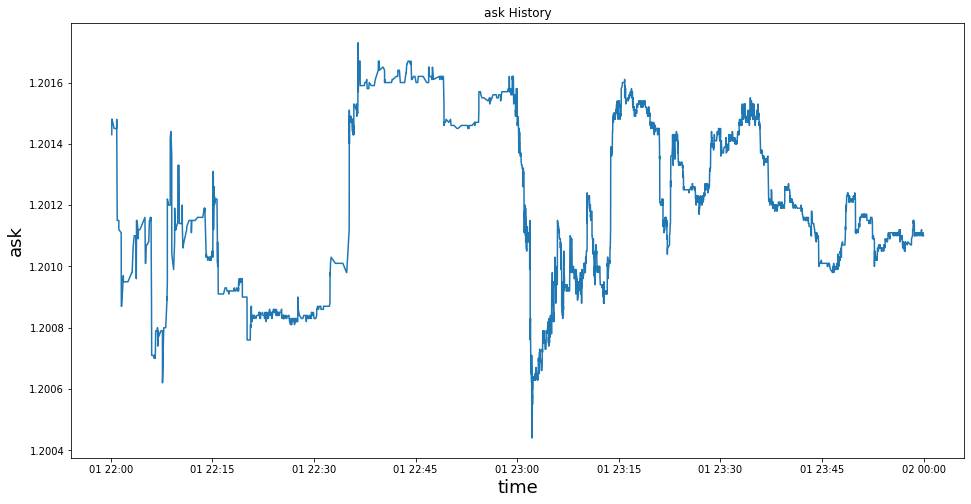

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('ask History')
plt.plot(tick_data['ask'])
plt.xlabel('time',fontsize=18)
plt.ylabel('ask',fontsize=18)
plt.show()

In [ ]:
# this code converts ticks data to ohlc for intervals of 60seconds
def convert_ticks_to_ohlc(df, df_columns, timeframe):
  data_frame = df[df_columns].resample(timeframe).ohlc()
  return data_frame

data_ask = convert_ticks_to_ohlc(tick_data, "ask", "90000L")
data_ask = data_ask.dropna()
data_ask

,open,high,low,close
time,,,,
2018-01-01 22:00:00,1.20143,1.20148,1.20112,1.20112
2018-01-01 22:01:30,1.20111,1.20111,1.20087,1.20095
2018-01-01 22:03:00,1.20098,1.20115,1.20096,1.20112
2018-01-01 22:04:30,1.20116,1.20116,1.20101,1.20116
2018-01-01 22:06:00,1.20088,1.20088,1.20070,1.20079
...,...,...,...,...
2018-01-01 23:52:30,1.20110,1.20110,1.20100,1.20106
2018-01-01 23:54:00,1.20106,1.20111,1.20105,1.20111
2018-01-01 23:55:30,1.20110,1.20112,1.20106,1.20108


In [ ]:
data_ask.describe()

,open,high,low,close
count,80.000000,80.000000,80.000000,80.000000
mean,1.201206,1.201283,1.201129,1.201209
std,0.000269,0.000258,0.000286,0.000267
min,1.200640,1.200790,1.200440,1.200630
25%,1.200995,1.201110,1.200908,1.201008
50%,1.201165,1.201245,1.201065,1.201165
75%,1.201462,1.201532,1.201435,1.201470
max,1.201630,1.201730,1.201610,1.201620


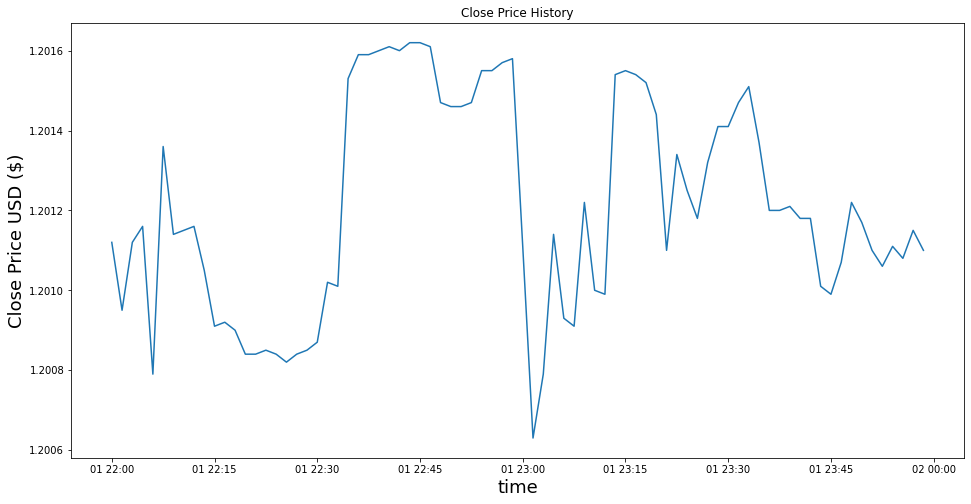

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data_ask['close'])
plt.xlabel('time',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
def graph_data_ohlc(dataset):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    closep=dataset[:,[3]]
    highp=dataset[:,[1]]
    lowp=dataset[:,[2]]
    openp=dataset[:,[0]]
    date=range(len(closep))

    x = 0
    y = len(date)
    ohlc = []
    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x]
        ohlc.append(append_me)
        x+=1
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    plt.xlabel('Candle')
    plt.ylabel('Price')
    plt.title('Candlestick sample representation')

    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

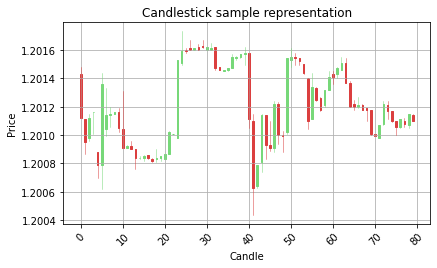

In [ ]:
graph_data_ohlc(data_ask.tail(100).values)

In [ ]:
def my_generator(data,lookback):
    final_output = []
    counter = 0
    first_row = 0
    arr = np.empty((1,lookback,4), int)
    for a in range(len(data)-lookback):
        temp_list = []
        for candle in data[first_row:first_row+lookback]:
            temp_list.append(candle)
        temp_list2 = np.asarray(temp_list)
        templist3 = [temp_list2]
        templist4 = np.asarray(templist3)
        arr = np.append(arr, templist4, axis=0)
        first_row=first_row+1
    return arr

In [ ]:
three_dim_sequence = np.asarray(my_generator(data_ask.values[1:],3))
three_dim_sequence.shape

(77, 3, 4)

In [ ]:
counter=0
for candle in three_dim_sequence[1000:1005]:
    counter=counter+1
    print('Step ' + str(counter))
    graph_data_ohlc(candle)

In [ ]:
def ohlc_to_candlestick(conversion_array):
    candlestick_data = [0,0,0,0]

    if conversion_array[3]>conversion_array[0]:
        candle_type=1
        wicks_up=conversion_array[1]-conversion_array[3]
        wicks_down=conversion_array[2]-conversion_array[0]
        body_size=conversion_array[3]-conversion_array[0]

    else:
        candle_type=0
        wicks_up=conversion_array[1]-conversion_array[0]
        wicks_down=conversion_array[2]-conversion_array[3]
        body_size=conversion_array[1]-conversion_array[3]


    if wicks_up < 0:wicks_up=wicks_up*(-1)
    if wicks_down < 0:wicks_down=wicks_down*(-1)
    if body_size < 0:body_size=body_size*(-1)
    candlestick_data[0]=candle_type
    candlestick_data[1]=round(round(wicks_up,5)*10000,2)
    candlestick_data[2]=round(round(wicks_down,5)*10000,2)
    candlestick_data[3]=round(round(body_size,5)*10000,2)

    return candlestick_data

In [ ]:
one_candle_data_ohlc=three_dim_sequence[1000:1010][5][1]
one_candle_data_ohlc

IndexError: ignored

In [ ]:
one_candle_data_ohlc_candle=ohlc_to_candlestick(one_candle_data_ohlc)
one_candle_data_ohlc_candle

In [ ]:
def my_generator_candle(data,lookback):
    first_row = 0
    arr = np.empty((1,lookback,4), int)
    for a in range(len(data)-lookback):
        temp_list = []
        for candle in data[first_row:first_row+lookback]:
            converted_data = ohlc_to_candlestick(candle)
            temp_list.append(converted_data)
        temp_list2 = np.asarray(temp_list)
        templist3 = [temp_list2]
        templist4 = np.asarray(templist3)
        arr = np.append(arr, templist4, axis=0)
        first_row=first_row+1
    return arr

In [ ]:
three_dim_sequence_candle=my_generator_candle(data_ask.values[1:],3)
three_dim_sequence_candle[5000:5005]

In [ ]:
def my_generator_candle_X_Y(data,lookback,MinMax = False):
    if MinMax==True:scaler = preprocessing.MinMaxScaler()
    first_row = 0
    arr = np.empty((0,lookback,4))
    arr3 = np.empty((0,lookback,4))
    Y_list = []
    for a in range(len(data)-lookback):
        temp_list = []
        temp_list_raw = []
        for candle in data[first_row:first_row+lookback]:
            converted_data = ohlc_to_candlestick(candle)
            temp_list.append(converted_data)
            temp_list_raw.append(candle)
        temp_list3 = [np.asarray(temp_list)]
        templist4 = np.asarray(temp_list3)

        if MinMax==True:
            templist99 = scaler.fit_transform(templist4[0])
            arr = np.append(arr, [templist99], axis=0)
        else:
            arr = np.append(arr, templist4, axis=0)

        temp_list7 = [np.asarray(temp_list_raw)]
        templist8 = np.asarray(temp_list7)
        arr3 = np.append(arr3, templist8, axis=0)

        converted_data_prediction = ohlc_to_candlestick(data[first_row+lookback])
        Prediction = converted_data_prediction[0]
        Y_list.append(Prediction)

        first_row=first_row+1

    arr2 = np.asarray(Y_list)

    return arr,arr2,arr3

In [ ]:
X,Y, X_raw = my_generator_candle_X_Y(data_ask.values,3,MinMax=False)
print('Shape of X ' + str(X.shape))
print('Shape of Y ' + str(Y.shape))
print('Shape of X raw ohlc ' + str(X_raw.shape))


In [ ]:
X[30]

In [ ]:
unique, counts = np.unique(Y, return_counts=True)
predictions_type = dict(zip(unique, counts))
print('Bull: ' + str((predictions_type[1])) + ' percent: ' + str(round((predictions_type[1]*100)/len(Y),2)) + '%')
print('Bear: ' + str((predictions_type[0])) + ' percent: ' + str(round((predictions_type[0]*100)/len(Y),2)) + '%')
print('Total: ' + str(len(Y)))

In [ ]:
for a in range(5):
    b=a+1000
    if Y[b] == 1:print('Correct prediction would be Bullish ---^')
    if Y[b] == 0:print('Correct prediction would be Bearish ---v')
    graph_data_ohlc(X_raw[b])

In [ ]:
print("Building model with:", '2 LSTM layers with 12,24 units') 
model = Sequential()

model.add(LSTM(units = 400, return_sequences = True, input_shape = (None,X.shape[-1])))
model.add(Dropout(0.3))

model.add(LSTM(units = 300, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 200, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.3))

model.add(Dense(units = 1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])

model.summary()

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.5)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

X_train_raw, X_val_and_test_raw= train_test_split(X_raw, test_size=0.5)
X_val_raw, X_test_raw = train_test_split(X_val_and_test_raw, test_size=0.5)

In [ ]:
print('Training data: ' + 'X Input shape: ' + str(X_train.shape) + ', ' + 'Y Output shape: ' + str(Y_train.shape) + ', ' + 'datetime shape: ' + str(Y_train.shape))
print('Validation data: ' + 'X Input shape: ' + str(X_val.shape) + ', ' + 'Y Output shape: ' + str(Y_val.shape) + ', ' + 'datetime shape: ' + str(Y_val.shape))
print('Test data: ' + 'X Input shape: ' + str(X_test.shape) + ', ' + 'Y Output shape: ' + str(Y_test.shape) + ', ' + 'datetime shape: ' + str(Y_test.shape))

In [ ]:
history = model.fit(X_train, Y_train,batch_size=500, epochs=20,validation_data=(X_val, Y_val))

In [ ]:
# Chart 1 - Model Loss
#plt.subplot(331)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


# Chart 2 - Model Accuracy
#plt.subplot(332)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

In [ ]:
class MeasureTime:
    def __init__(self):
        self.start = time.time()
    def kill(self):
        print ('Time elapsed: ' + time.strftime("%H:%M:%S", time.gmtime(time.time()-self.start)))
        del self

In [ ]:
cell_timer = MeasureTime()
counter = 0
won = 0
lost = 0
test = model.predict(X_test)
alpha_distance = 0.35

for a in test:
    #print(a)
    if a.any() > (1-alpha_distance) or a.any() < alpha_distance :
        print(a.any)
        if Y_test[counter] == 1:print('Correct prediction is Bullish')
        if Y_test[counter] == 0:print('Correct prediction is Bearish')
        if a.any() > (1-alpha_distance):print('Model prediction is Bullish')
        if a.any() < alpha_distance:print('Model prediction is Bearish')

        if (a.any() > (1-alpha_distance) and Y_test[counter] == 1) or (a.any() < alpha_distance and Y_test[counter] == 0):
            won=won+1
            print('WON')
        else:
            print('LOST')
            lost=lost+1

        graph_data_ohlc(X_test_raw[counter])

    counter=counter+1
print('Won: ' + str(won) + ' Lost: ' + str(lost))
print('Success rate: ' + str(round((won*100)/(won+lost),2)) + '%')
cell_timer.kill()

In [ ]:

def get_feature_importance(model,X_train_dataset,feature_names):
    pred_x = model.predict(X_train_dataset)

    random_ind = np.random.choice(X_train.shape[0], 1000, replace=False)

    data = X_train[random_ind[0:500]]
    e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output),data)
    test1 = X_train[random_ind[500:1000]]
    shap_val = e.shap_values(test1)
    shap_val = np.array(shap_val)
    shap_val = np.reshape(shap_val,(int(shap_val.shape[1]),int(shap_val.shape[2]),int(shap_val.shape[3])))
    shap_abs = np.absolute(shap_val)
    sum_0 = np.sum(shap_abs,axis=0)
    x_pos = [i for i, _ in enumerate(f_names)]

    plt.figure(figsize=(10,6))

    plt1 = plt.subplot(4,1,1)
    plt1.barh(x_pos,sum_0[2])
    plt1.set_yticks(x_pos)
    plt1.set_yticklabels(feature_names)
    plt1.set_title('features of last candle')

    plt2 = plt.subplot(4,1,2,sharex=plt1)
    plt2.barh(x_pos,sum_0[1])
    plt2.set_yticks(x_pos)
    plt2.set_yticklabels(feature_names)
    plt2.set_title('features of last candle -1')

    plt3 = plt.subplot(4,1,3,sharex=plt1)
    plt3.barh(x_pos,sum_0[0])
    plt3.set_yticks(x_pos)
    plt3.set_yticklabels(feature_names)
    plt3.set_title('features of last candle -2')

    plt.tight_layout()
    plt.show()

In [ ]:
features_list=['candle type','wicks up', 'wicks down', 'body size']
get_feature_importance(model,X_train,features_list)

In [ ]:
EURUSD_dataset = pd.read_csv('Hour/EURUSD.csv')
del EURUSD_dataset['Gmt time']
del EURUSD_dataset['Volume']
X,Y, X_raw = my_generator_candle_X_Y(EURUSD_dataset.values,3,MinMax=False)

In [ ]:
GBPUSD_dataset = pd.read_csv('Hour/GBPUSD.csv')
del GBPUSD_dataset['Gmt time']
del GBPUSD_dataset['Volume']
X2,Y2, X2_raw = my_generator_candle_X_Y(GBPUSD_dataset.values,3,MinMax=False)

In [ ]:
USDCAD_dataset = pd.read_csv('Hour/USDCAD.csv')
del USDCAD_dataset['Gmt time']
del USDCAD_dataset['Volume']
X3,Y3, X3_raw = my_generator_candle_X_Y(USDCAD_dataset.values,3,MinMax=False)

In [ ]:
NZDUSD_dataset = pd.read_csv('Hour/NZDUSD.csv')
del NZDUSD_dataset['Gmt time']
del NZDUSD_dataset['Volume']
X4,Y4, X4_raw = my_generator_candle_X_Y(NZDUSD_dataset.values,3,MinMax=False)

In [ ]:
def evaluate_candle_model(model_passed,alpha_distance,X,Y,X_raw,print_charts=False):
    counter = 0
    won = 0
    lost = 0
    test = model_passed.predict(X)
    for a in test:
        if a > (1-alpha_distance) or a < alpha_distance :
            if print_charts==True:
                print(a)
                if Y[counter] == 1:print('Correct prediction is Bullish')
                if Y[counter] == 0:print('Correct prediction is Bearish')
                if a > (1-alpha_distance):print('Model prediction is Bullish')
                if a < alpha_distance:print('Model prediction is Bearish')
            if (a > (1-alpha_distance) and Y[counter] == 1) or (a < alpha_distance and Y[counter] == 0):
                won=won+1
                if print_charts==True:print('WON')
            else:
                if print_charts==True:print('LOST')
                lost=lost+1

            if print_charts==True:graph_data_ohlc(X_raw[counter])

        counter=counter+1
    if won != 0:
        print('Won: ' + str(won) + ' Lost: ' + str(lost))
        print('Success rate: ' + str(round((won*100)/(won+lost),2)) + '%')
    return [won+lost,won,lost]

In [ ]:
alpha_distance = 0.30

total=0
win=0
loss=0

print('EURUSD Prediction:')
evaluation = evaluate_candle_model(model,alpha_distance,X,Y,X_raw,print_charts=False)
total = total + evaluation[0]
win = win + evaluation[1]
loss = loss + evaluation[2]
print('---------------------------------------------------')
print('GBPUSD Prediction:')
evaluation = evaluate_candle_model(model,alpha_distance,X2,Y2,X2_raw,print_charts=False)
total = total + evaluation[0]
win = win + evaluation[1]
loss = loss + evaluation[2]
print('---------------------------------------------------')
print('USDCAD Prediction:')
evaluation = evaluate_candle_model(model,alpha_distance,X3,Y3,X3_raw,print_charts=False)
total = total + evaluation[0]
win = win + evaluation[1]
loss = loss + evaluation[2]
print('---------------------------------------------------')
print('NZDUSD Prediction:')
evaluation = evaluate_candle_model(model,alpha_distance,X4,Y4,X4_raw,print_charts=False)
total = total + evaluation[0]
win = win + evaluation[1]
loss = loss + evaluation[2]
print('---------------------------------------------------')
print('USDJPY Prediction:')
evaluation = evaluate_candle_model(model,alpha_distance,X5,Y5,X5_raw,print_charts=False)
total = total + evaluation[0]
win = win + evaluation[1]
loss = loss + evaluation[2]
print('---------------------------------------------------')
print('AUDUSD Prediction:')
evaluation = evaluate_candle_model(model,alpha_distance,X6,Y6,X6_raw,print_charts=False)
total = total + evaluation[0]
win = win + evaluation[1]
loss = loss + evaluation[2]
print('---------------------------------------------------')
print('USDCHF Prediction:')
evaluation = evaluate_candle_model(model,alpha_distance,X7,Y7,X7_raw,print_charts=False)
total = total + evaluation[0]
win = win + evaluation[1]
loss = loss + evaluation[2]
print('---------------------------------------------------')    
print('PREDICTIONS WIN: ' + str(win))
print('PREDICTIONS LOSS: ' + str(loss))
print('PREDICTIONS ACCURACY: ' + str(round((win*100)/(win+loss),2)) + '%')
print('PREDICTIONS PER MONTH: ' + str(round(total/192,0)))
print('PREDICTIONS TEST PERIOD: ' + '16 YEARS (2013-2019)')